# **ES114 Probability Lab Assignment 9 - Dimensionality Reduction**
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**By Karan Sagar Gandhi (23110157)**

In this notebook I have done Dimensionality Reduction on the IRIS dataset that was given to us. I have divided this notebook into 4 sections. I do the following in each section:

1. Estimate the covariance matrix of the 4 attributes.
2. Estimate the four principal components of the data.
3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.
4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.


## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from google.colab import output # To disable scrolling in the cells

## Loading the Dataset

In [ ]:
dataset = sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Defining Functions

Here I have defined various functions:

* **CalculateExpectationAndVariance:** This function will take in the dataset and calculate the expectation and the variance of the given data.
* **CalculateCovariance:** This function will take in the data and the columns and return the correlation between the 2 columns.
* **CalculateCovarianceMatrix:** This will calculate the covariance matrix of the given data.

In [ ]:
def CalculateExpectationAndVariance(data):
  data = np.array(data)
  mean = 0
  for i in range(len(data)):
    mean += data[i]

  mean /= len(data)
  var = 0

  for i in range(len(data)):
    var += (data[i] - mean) ** 2

  var /= len(data) - 1

  return mean, var

def CalculateCovariance(dataset, a, b):
  # First we will calculate the mean and the variance of the 2 columns independently
  E_x, var_x = CalculateExpectationAndVariance(dataset.iloc[:, a])
  E_y, var_y = CalculateExpectationAndVariance(dataset.iloc[:, b])

  # Now we will find the covariance of the two columns
  covariance = 0
  for i in range(dataset.shape[0]):
    covariance += (dataset.iloc[i, a] - E_x) * (dataset.iloc[i, b] - E_y)

  covariance /= dataset.shape[0] - 1

  return covariance

def CalculateCovarianceMatrix(dataset):
  cov = np.zeros((4, 4)) # Here we know the shape of the data which we will be getting

  for i in range(4):
    for j in range(4):
      cov[i][j] = CalculateCovariance(dataset, i, j)

  return cov

## Part 1 - Covariance Matrix

In this part I just call the function and calculate the Covariance Matrix

In [ ]:
cov_matrix = CalculateCovarianceMatrix(dataset)
cov_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## Part 2 - Calculating the principle components

Principle components are the components along which the variance is maximum. These principle components should be orthogonal to each other. It is easy to prove the eigenvectors of the cov_matrix are the principle components along which the variance is maximised

In [ ]:
for i in range(4):
  e, var = CalculateExpectationAndVariance(dataset.iloc[:, i])
  dataset.iloc[:, i] -= e
  dataset.iloc[:, i] /= math.sqrt(var)

In [ ]:
standardize_cov_matrix = CalculateCovarianceMatrix(dataset)
standardize_cov_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [ ]:
evals, evect = np.linalg.eig(standardize_cov_matrix) # this will by default return the eigenvectors in their decreasing order of the eigenvalues

for idx, i in enumerate(evect.T):
  print(f'Principle Component {idx + 1}:', i)
print()
print("Eigenvalues:", evals)
print("Eigenvector matrix:\n", evect)

Principle Component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principle Component 2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Principle Component 3: [-0.71956635  0.24438178  0.14212637  0.63427274]
Principle Component 4: [ 0.26128628 -0.12350962 -0.80144925  0.52359713]

Eigenvalues: [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvector matrix:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
arr = []
for i in range(evect.shape[0]):
  arr.append(CalculateExpectationAndVariance(np.matmul(dataset.iloc[:, :4], evect.T[i]))[1]) # Calculate the variance along that axis

arr = arr / np.sum(arr) * 100

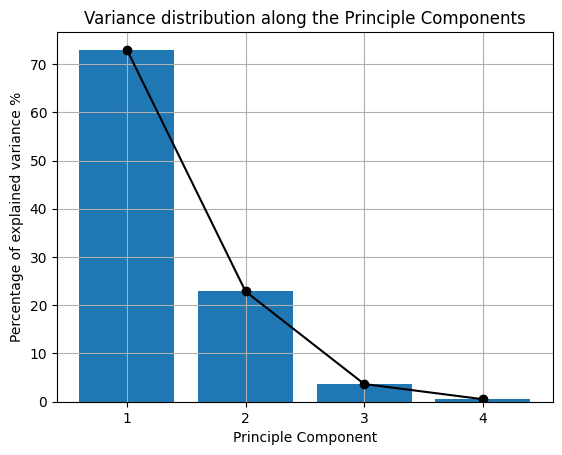

In [ ]:
plt.figure()
plt.title('Variance distribution along the Principle Components')
plt.bar(['1', '2', '3', '4'], arr)
plt.plot(['1', '2', '3', '4'], arr, 'o-', color='black')
plt.xlabel('Principle Component')
plt.ylabel("Percentage of explained variance %")
plt.grid()
plt.show()

## Part 3 - Dimensionality Reduction using PCA
In this section I perform PCA on the given data. I reduce it to 3 and 2 dimensions.

In [ ]:
data_3d = np.matmul(evect[:, :3].T, dataset.iloc[:, :4].T).T
data_2d = np.matmul(evect[:, :2].T, dataset.iloc[:, :4].T).T
data_3d['species'] = dataset['species']
data_2d['species'] = dataset['species']
print("Data reduced to 2 dimensions")
display(data_2d)
print("Data reduced to 3 dimensions")
display(data_3d)

Data reduced to 2 dimensions


,0,1,species
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa
...,...,...,...
145,1.864258,-0.385674,virginica
146,1.559356,0.893693,virginica
147,1.516091,-0.268171,virginica
148,1.368204,-1.007878,virginica


Data reduced to 3 dimensions


,0,1,2,species
0,-2.257141,-0.478424,-0.127280,setosa
1,-2.074013,0.671883,-0.233826,setosa
2,-2.356335,0.340766,0.044054,setosa
3,-2.291707,0.595400,0.090985,setosa
4,-2.381863,-0.644676,0.015686,setosa
...,...,...,...,...
145,1.864258,-0.385674,0.255418,virginica
146,1.559356,0.893693,-0.026283,virginica
147,1.516091,-0.268171,0.179577,virginica
148,1.368204,-1.007878,0.930279,virginica


## Part 4 - Visualising reduced data
In this section I visualise the reduced data, labeling the different species

In [ ]:
species = dataset['species'].unique()

### Reducing to 2 dimentions

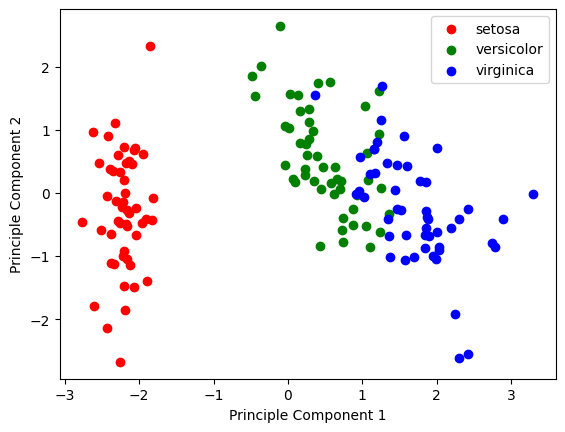

In [ ]:
plt.figure()

colors = 'rgb'
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

for i in range(3):
  plt.scatter(data_2d[data_2d['species'] == species[i]].iloc[:, 0],
             data_2d[data_2d['species'] == species[i]].iloc[:, 1], c=colors[i], marker='o', label=species[i])
plt.legend()
plt.show()

### Reducing to 3 dimentions

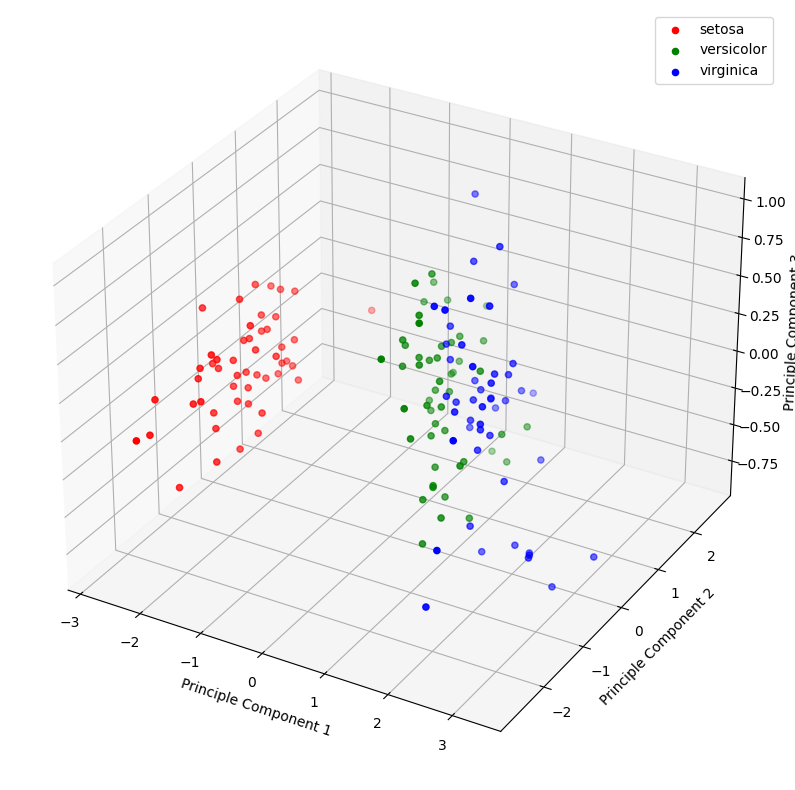

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
colors = 'rgb'
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
for i in range(3):
  ax.scatter(data_3d[data_3d['species'] == species[i]].iloc[:, 0],
             data_3d[data_3d['species'] == species[i]].iloc[:, 1],
             data_3d[data_3d['species'] == species[i]].iloc[:, 2], c=colors[i], marker='o', label=species[i])
ax.legend()
fig.tight_layout()
fig.show()

## References

1. “Principal Components Analysis,” _Carnegie Mellon University_. Available: https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf

2. “Google Colaboratory: Is there any way to expand the height of the result cell of running a code?,” _Stack Overflow_. https://stackoverflow.com/questions/55546869/google-colaboratory-is-there-any-way-to-expand-the-height-of-the-result-cell-of (accessed Mar. 02, 2024).